# Optimizing E-commerce Logistics

## 1. Problem definition

This research aims to develop a neural network model that can distinguish between on-time and delay shipments, then we are going implement our model on test set to forecast whether these shipments will arrive on-time or not.

## 2. Data Preparation

* Data source: The dataset, collected by an international e-commerce company, records all shipment details [Link](https://www.kaggle.com/datasets/prachi13/customer-analytics).
* Data organization: 1 CSV file organized in a long data format.
* Sample size: 10,999 observations.
* Number of features: 12 columns.

## 3. Data Preprocessing

### a. Data cleaning

First we import required packages to construct Neural Network model and Outcome Summary:

In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math #basic calculation
import pandas as pd
import seaborn as sns #plot in data analysis
import numpy as np
import matplotlib.pylab as plt #plot confusion matrix
import matplotlib.pyplot as plt #plot confusion matrix
%matplotlib inline

#Package for neural network
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Package for data normalization
from sklearn.preprocessing import MinMaxScaler

#Package for model evaluation
from dmba import classificationSummary
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Loading shipments dataset
shipments = pd.read_csv('shipments.csv')

In [3]:
# Viewing dataframe structure
shipments.shape

(10999, 12)

In [4]:
# Running the dataset
shipments

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [5]:
# Checking datatype
shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


There are 8 numerical variables and 4 string variables in the original dataset

Text(0.5, 1.0, 'Empty Data')

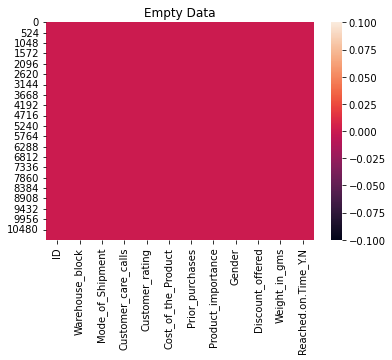

In [6]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(shipments.isnull())
plt.title("Empty Data")

There is no missing value in our dataset

In [7]:
#Droping ID column (because ID = index + 1)
shipments.drop(['ID'], axis=1, inplace=True)

In [8]:
#Renaming column Reached.on.Time_Y.N (ontime = 0, delayed = 1)
shipments.rename(columns={'Reached.on.Time_Y.N': 'Shipment_status'}, inplace=True)

In [9]:
#Running the dataset
shipments

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipment_status
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [10]:
#Investigating all the elements whithin each feature 

for column in shipments: #create a loop to go through all columns in our dataset
    unique_values = np.unique(shipments[column]) #take out the unique values
    nr_values = len(unique_values) #number of unique values
    if nr_values <= 10: #if clause to print the outcomes
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Warehouse_block is: 5 -- ['A' 'B' 'C' 'D' 'F']
The number of values for feature Mode_of_Shipment is: 3 -- ['Flight' 'Road' 'Ship']
The number of values for feature Customer_care_calls is: 6 -- [2 3 4 5 6 7]
The number of values for feature Customer_rating is: 5 -- [1 2 3 4 5]
The number of values for feature Cost_of_the_Product is: 215
The number of values for feature Prior_purchases is: 8 -- [ 2  3  4  5  6  7  8 10]
The number of values for feature Product_importance is: 3 -- ['high' 'low' 'medium']
The number of values for feature Gender is: 2 -- ['F' 'M']
The number of values for feature Discount_offered is: 65
The number of values for feature Weight_in_gms is: 4034
The number of values for feature Shipment_status is: 2 -- [0 1]


### b. Exploratory data analysis

<AxesSubplot:xlabel='Shipment_status', ylabel='count'>

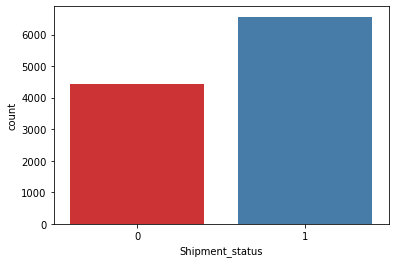

In [11]:
#Investigating the distribution of outcome variable Shipment_status (ontime = 0, delayed = 1)
sns.countplot(x = 'Shipment_status', data = shipments, palette = 'Set1')

In [12]:
#Pivot table Shipment_status with warehouse_block
pd.crosstab(shipments.Warehouse_block, shipments.Shipment_status)

Shipment_status,0,1
Warehouse_block,,
A,758,1075
B,729,1104
C,739,1094
D,738,1096
F,1472,2194


In [13]:
#Pivot table Shipment_status with Mode_of_Shipment
pd.crosstab(shipments.Mode_of_Shipment, shipments.Shipment_status)

Shipment_status,0,1
Mode_of_Shipment,,
Flight,708,1069
Road,725,1035
Ship,3003,4459


In [14]:
#Pivot table Shipment_status with Product_importance
pd.crosstab(shipments.Product_importance, shipments.Shipment_status)

Shipment_status,0,1
Product_importance,,
high,332,616
low,2157,3140
medium,1947,2807


### c. Data conversion

In this section, we are going to convert categorical variables into dummy variables to fit into the neural network model

In [15]:
#Converting categorical variables into numeric variables
processed = pd.get_dummies(shipments, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])

In [16]:
#Determining outcome and predictors
outcome = 'Shipment_status'
predictors = [c for c in processed.columns if c != outcome]

In [17]:
#Conducting data normalization
scaler = MinMaxScaler()
processed = pd.DataFrame(scaler.fit_transform(processed),index=processed.index,columns=processed.columns)

In [18]:
processed

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Shipment_status,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.4,0.00,0.728972,0.375,0.000000,0.078451,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10995,0.4,0.00,0.635514,0.375,0.078125,0.035939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10996,0.6,0.75,0.682243,0.375,0.046875,0.022498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10997,0.6,0.25,0.593458,0.500,0.015625,0.030533,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
#Converting data to binary
list_int = ['Shipment_status',
       'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Gender_F', 'Gender_M']
processed[list_int] = processed[list_int].astype('int')

In [20]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        10999 non-null  float64
 1   Customer_rating            10999 non-null  float64
 2   Cost_of_the_Product        10999 non-null  float64
 3   Prior_purchases            10999 non-null  float64
 4   Discount_offered           10999 non-null  float64
 5   Weight_in_gms              10999 non-null  float64
 6   Shipment_status            10999 non-null  int32  
 7   Warehouse_block_A          10999 non-null  int32  
 8   Warehouse_block_B          10999 non-null  int32  
 9   Warehouse_block_C          10999 non-null  int32  
 10  Warehouse_block_D          10999 non-null  int32  
 11  Warehouse_block_F          10999 non-null  int32  
 12  Mode_of_Shipment_Flight    10999 non-null  int32  
 13  Mode_of_Shipment_Road      10999 non-null  int

Outcome: We successfully scale variables to 0-1 and all categorical variables are transformed to dummy values 0-1 range

## 4. Data Modelling

First, we will be specifying the network architecture, this includes:
* Number of inputs: equal to number of predictors 19
* Number of output nodes: our neural network is a binary classifier, then it also has a single output node
* Number of hidden layers: most popular – we try one hidden layer for our problem
* Number of nodes in the hidden layer: midway between input and output nodes (from 1 to 19) and equal to 2/3 input nodes + output nodes, so we are going to choose 14 as number of hidden nodes

In [21]:
# Splitting the dataset into training set, valid set, and test set, size = 0.8:0.19:0.01
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(valid_X, valid_y, test_size=0.005, random_state=1)

In [22]:
train_X.shape, valid_X.shape, test_X.shape, train_y.shape, valid_y.shape, test_y.shape

((8799, 19), (2189, 19), (11, 19), (8799,), (2189,), (11,))

In [23]:
# Fitting into a neural network with 1 hidden layer, 14 hidden nodes, activation function logistic
clf = MLPClassifier(hidden_layer_sizes=(14,), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y.values)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(14,), random_state=1,
              solver='lbfgs')

In [24]:
# training performance
classificationSummary(train_y, clf.predict(train_X))

# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.6922)

       Prediction
Actual    0    1
     0 2705  864
     1 1844 3386
Confusion Matrix (Accuracy 0.6469)

       Prediction
Actual   0   1
     0 610 255
     1 518 806


In [25]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':45})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

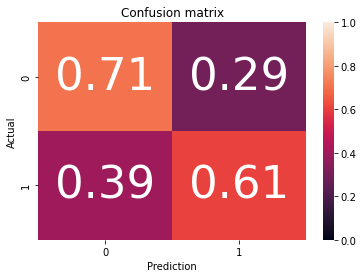

In [26]:
# Plotting Confusion Matrix on validation data 
cm = confusion_matrix(valid_y, clf.predict(valid_X))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = clf.classes_, title='Confusion matrix')

## 5. Model Implementation

In this section we are going to use the neural network model to predict 11 records of test set

In [27]:
test_X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
3011,0.4,1.00,0.285047,0.250,0.171875,0.005405,0,0,0,0,1,1,0,0,0,0,1,1,0
8647,0.8,0.00,0.883178,0.250,0.031250,0.065303,0,0,0,0,1,1,0,0,0,1,0,1,0
1589,0.4,0.25,0.481308,0.000,0.046875,0.343316,0,0,0,0,1,0,0,1,0,0,1,1,0
781,0.0,0.75,0.121495,0.000,0.484375,0.030972,0,0,0,0,1,0,0,1,0,1,0,1,0
6993,0.6,1.00,0.747664,0.125,0.078125,0.459313,0,1,0,0,0,1,0,0,0,0,1,1,0
8380,0.6,0.25,0.700935,0.125,0.125000,0.700365,0,0,1,0,0,0,0,1,0,1,0,1,0
9184,0.4,0.50,0.574766,0.375,0.109375,0.102411,0,0,1,0,0,1,0,0,0,1,0,1,0
712,0.4,0.25,0.490654,0.125,0.593750,0.155588,0,0,1,0,0,0,0,1,0,0,1,1,0
3016,0.6,1.00,0.462617,0.125,0.843750,0.239591,0,0,1,0,0,1,0,0,0,1,0,0,1
4586,0.2,0.00,0.228972,0.125,0.140625,0.491308,1,0,0,0,0,0,0,1,1,0,0,1,0


In [28]:
clf.predict(test_X)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

Outcome: 'Delayed', 'On time', 'On time', 'Delayed', 'Delayed', 'On time', 'Delayed', 'Delayed', 'Delayed', 'Delayed', 'On time'

## 6. Conclusion

Model accuracy on the validation set is 0.6469, acceptable in this supply chain field. We can use this neural network model to forecast shipment status before delivery. If the outcome of prediction is 'Delayed' like shipments 1,4,5,7,8,9,10 in the test set of model implementation, we can adjust Mode_of_Shipment to ensure shipments will arrive on time, thus enhancing the performance of delivery service of the company.

Suggestions to develop model:
* Collect data of order date to estimate the maximum leadtime of shipment as delivery policy
* Collect customer location data to calculate the delivery time for each ship mode
* Feed these variables into the model for prediction and/or build new model to automate picking ship mode task when improving delivery service of the company